In [ ]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [ ]:
#reading data
df=pd.read_csv('/data.csv')
df.head(10)

,Establishment_id,Name,Category,Inspection_date,Inspection_results,City,State,Zip,Address_line_1,Address_line_2,...,Hot_and_cold_running_water_provided,Proper_sewage_disposal,No_bare_hand_contact,Adequate_hand_washing_facilities,Rodent_and_insects,Food_contact_surfaces_and_equipment,Inspection_type,Owner,Type,Location
0,1146,PIZZA HUT 23538,Fast Food - Chain,5/29/2020 0:00,Non-Compliant - Violations Observed,COLLEGE PARK,MD,20740,9015 BALTIMORE AVE,------,...,In Compliance,In Compliance,In Compliance,In Compliance,In Compliance,In Compliance,Change Of Ownership,LUIS IBARGUENGOYTIA,Food Establishments,POINT (-76.931327 38.999878)
1,2196,SEVEN ELEVEN 11664C,Convenience Store,7/9/2020 0:00,Compliance Schedule - Outstanding,COLLEGE PARK,MD,20740,4404 KNOX RD,------,...,In Compliance,In Compliance,In Compliance,In Compliance,In Compliance,In Compliance,Re-inspection,RUCHEE JUDGE,Food Establishments,POINT (-76.938659 38.980959)
2,342,COLLEGE PARK DINER,Restaurant,7/17/2020 0:00,------,COLLEGE PARK,MD,20740,9206 BALTIMORE AVE,------,...,In Compliance,In Compliance,In Compliance,In Compliance,In Compliance,In Compliance,NaN,Adel RIAD,Food Establishments,POINT (-76.929936 39.006215)
3,2228,SEVEN ELEVEN 11642B,Convenience Store,3/16/2020 0:00,Non-Compliant - Violations Observed,COLLEGE PARK,MD,20740,4921 EDGEWOOD RD,------,...,In Compliance,In Compliance,In Compliance,In Compliance,In Compliance,In Compliance,Comprehensive,EABA YADOTA,Food Establishments,POINT (-76.922405 39.015982)
4,730,JASON'S DELI,Fast Food - Chain,3/13/2020 0:00,Compliance Schedule - Outstanding,COLLEGE PARK,MD,20740,7356 BALTIMORE AVE,------,...,In Compliance,In Compliance,In Compliance,In Compliance,In Compliance,In Compliance,Re-inspection,JOE TORTORICE JR,Food Establishments,POINT (-76.937981 38.980544)
5,329,CHIPOTLE MEXICAN GRILL 1786,Fast Food - Chain,3/16/2020 0:00,Compliant - No Health Risk,COLLEGE PARK,MD,20740,10250 BALTIMORE AVE,------,...,In Compliance,In Compliance,In Compliance,In Compliance,In Compliance,In Compliance,Monitoring,MONTGOMERY F MORAN,Food Establishments,POINT (-76.924414 39.022738)
6,2139,POTBELLY SANDWICH WORKS,Fast Food,10/21/2019 0:00,Compliance Schedule - Completed,COLLEGE PARK,MD,20740,10260 BALTIMORE AVE,H,...,In Compliance,In Compliance,In Compliance,In Compliance,In Compliance,In Compliance,Re-inspection,BASYE MOSKOWITZ,Food Establishments,POINT (-76.924545 39.022579)
7,6345,Frutta Bowls,Restaurant,10/18/2019 0:00,Non-Compliant - Violations Observed,COLLEGE PARK,MD,20740,8150 BALTIMORE AVE,B,...,In Compliance,In Compliance,In Compliance,In Compliance,Out of Compliance,In Compliance,Comprehensive,ROBERT CALAVETTA,Food Establishments,POINT (-76.933738 38.991271)
8,1605,UMCP - PANDA EXPRESS 802,College/University,10/17/2019 0:00,Non-Compliant - Violations Observed,COLLEGE PARK,MD,20742,3841 CAMPUS DR,------,...,In Compliance,In Compliance,In Compliance,In Compliance,In Compliance,In Compliance,Comprehensive,PEGGY CHERNG,Food Establishments,POINT (-76.948226 38.984828)
9,8268,TROPICAL SMOOTHIE CAFE,Carry-out,10/21/2019 0:00,Compliance Schedule - Outstanding,COLLEGE PARK,MD,20740,10260 BALTIMORE AVE,------,...,In Compliance,In Compliance,In Compliance,In Compliance,In Compliance,In Compliance,Re-inspection,JIGNA PATEL,Food Establishments,POINT (-76.924545 39.022579)


In [ ]:
df.dtypes

Establishment_id                        int64
Name                                   object
Category                               object
Inspection_date                        object
Inspection_results                     object
City                                   object
State                                  object
Zip                                     int64
Address_line_1                         object
Address_line_2                         object
Food_from_approved_source              object
Food_protected_from_contamination      object
Ill_workers_restricted                 object
Proper_hand_washing                    object
Cooling_time_and_temperature           object
Cold_holding_temperature               object
Hot_holding_temperature                object
Cooking_time_and_temperature           object
Reheating_time_and_temperature         object
Hot_and_cold_running_water_provided    object
Proper_sewage_disposal                 object
No_bare_hand_contact              

In [ ]:
#dropping duplucates
df.drop_duplicates(inplace=True)

In [ ]:
df.shape

(2569, 29)

In [ ]:
df.isnull().sum()

Establishment_id                         0
Name                                     0
Category                                47
Inspection_date                          0
Inspection_results                       0
City                                     0
State                                    0
Zip                                      0
Address_line_1                           0
Address_line_2                           0
Food_from_approved_source                0
Food_protected_from_contamination        0
Ill_workers_restricted                   0
Proper_hand_washing                      0
Cooling_time_and_temperature             0
Cold_holding_temperature                 0
Hot_holding_temperature                  0
Cooking_time_and_temperature             0
Reheating_time_and_temperature           0
Hot_and_cold_running_water_provided      0
Proper_sewage_disposal                   0
No_bare_hand_contact                     0
Adequate_hand_washing_facilities         0
Rodent_and_

In [ ]:
df['Inspection_type'].unique()

array(['Change Of Ownership', 'Re-inspection', nan, 'Comprehensive',
       'Monitoring', 'Pre-Opening Inspection', 'Food Complaint',
       'Single Foodborne Illness', 'Other', 'Fire / Natural Disaster',
       'Re-inspection Phone/ Verification', 'Foodborne Outbreak'],
      dtype=object)

In [ ]:
df=df.replace('------',np.nan)
df=df.replace('nan',np.nan)

In [ ]:
df['City'].unique()

array(['COLLEGE PARK', 'College Park'], dtype=object)

In [ ]:
#extracting year from Inspection_year
df['Inspection_date']=pd.to_datetime(df['Inspection_date'])
df['Inspection_year']=df['Inspection_date'].dt.year
df['Inspection_year'].unique()

array([2020, 2019, 2018, 2021, 2014, 2017, 2013, 2015, 2012, 2011, 2016])

In [ ]:
# grouping the data by Inspection_results and counting the data accordingly
df2=pd.DataFrame(df.groupby(['Inspection_results'])['Establishment_id'].count().reset_index())
df2.columns=['Inspection_results','count']
df2['result_percent'] = (df2['count'] / 
                      df2['count'].sum()) * 100

In [ ]:
df2.head(10)

,Inspection_results,count,result_percent
0,Compliance Schedule - Completed,188,10.892236
1,Compliance Schedule - Outstanding,312,18.076477
2,Compliant - Health Risk,2,0.115875
3,Compliant - No Health Risk,290,16.801854
4,Critical Violations observed,596,34.530707
5,Facility Closed,19,1.100811
6,Facility Reopened,9,0.521437
7,Non-Compliant - Violations Observed,310,17.960603


<Axes: xlabel='Inspection_results', ylabel='count'>

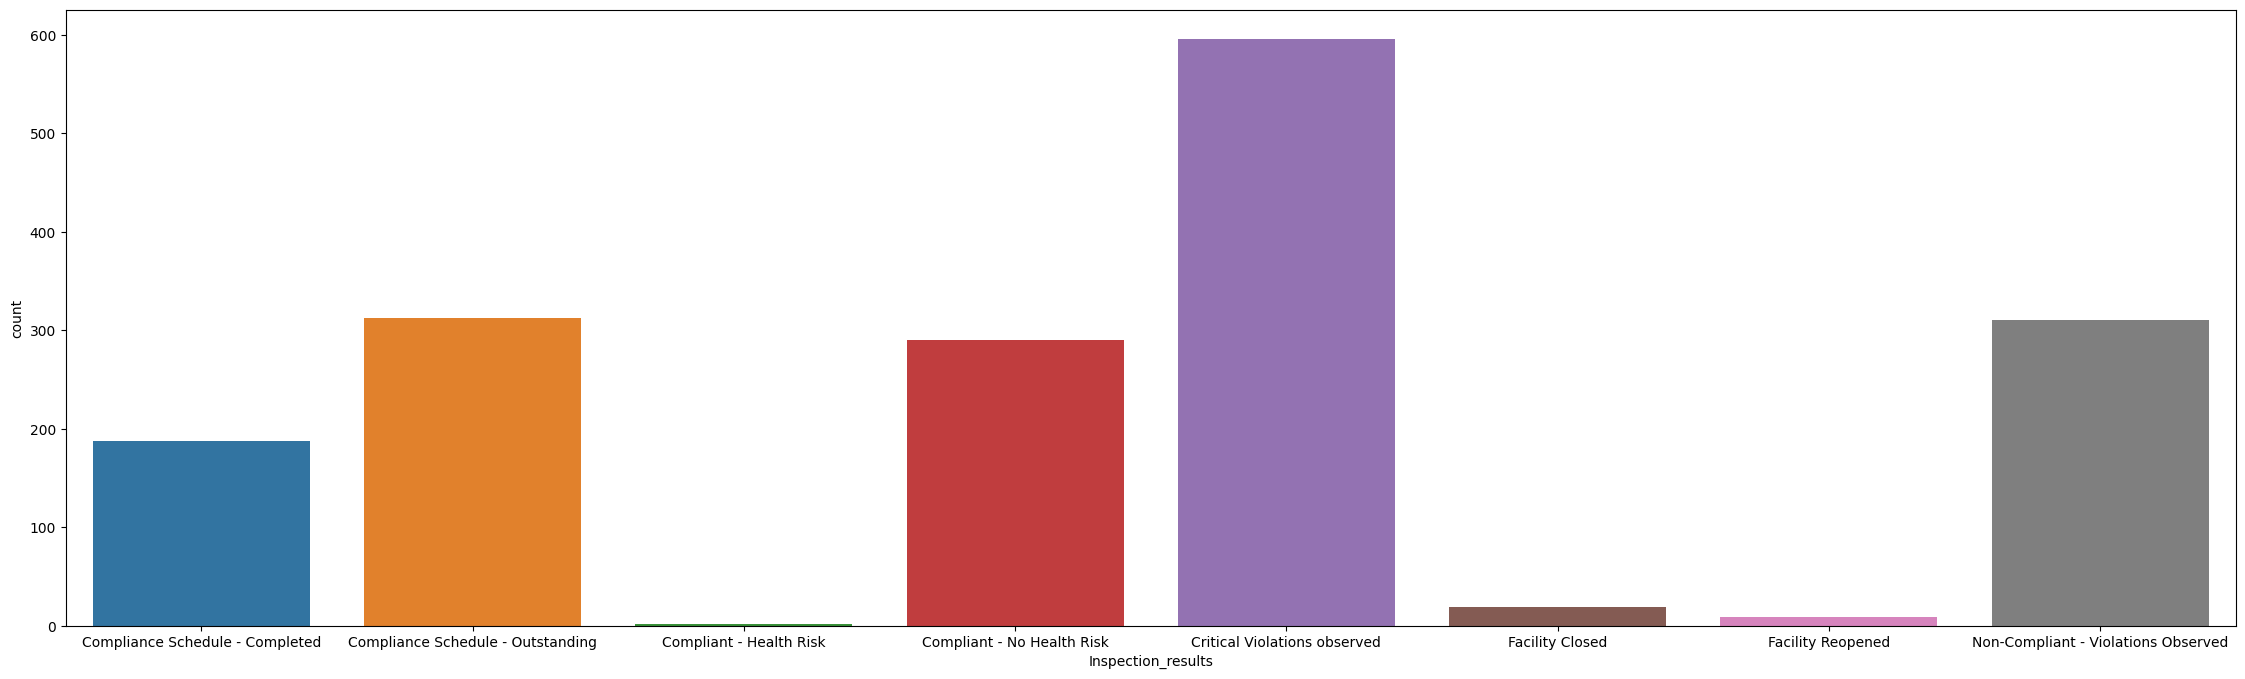

In [ ]:
# plotting barplot for Inspection_results
plt.figure(figsize=(28,8))
sns.barplot(x='Inspection_results',y='count',data = df2,errwidth=0)

In [ ]:
# grouping the data by Inspection_results and category and counting the data accordingly
df3=pd.DataFrame(df.groupby(['Inspection_results','Category'])['Establishment_id'].count().reset_index())
df3.columns=['Inspection_results','Category','count']

# limiting the data to Critical Violations observed
df3=df3[df3['Inspection_results']=='Critical Violations observed']
df3.sort_values('count',ascending=False,inplace=True)
df3=df3.head(10)
df3['category_percent'] = (df3['count'] / 
                      df3['count'].sum()) * 100
df3.head(10)


,Inspection_results,Category,count,category_percent
87,Critical Violations observed,Full Service,217,39.743590
81,Critical Violations observed,College/University,120,21.978022
83,Critical Violations observed,Fast Food,54,9.890110
78,Critical Violations observed,Carry-out,50,9.157509
82,Critical Violations observed,Convenience Store,40,7.326007
90,Critical Violations observed,Hotel,16,2.930403
89,Critical Violations observed,Grocery Store,16,2.930403
95,Critical Violations observed,Restaurant,15,2.747253
84,Critical Violations observed,Fast Food - Chain,11,2.014652
96,Critical Violations observed,Snack Bar/Concession Stand,7,1.282051


<Axes: xlabel='Category', ylabel='count'>

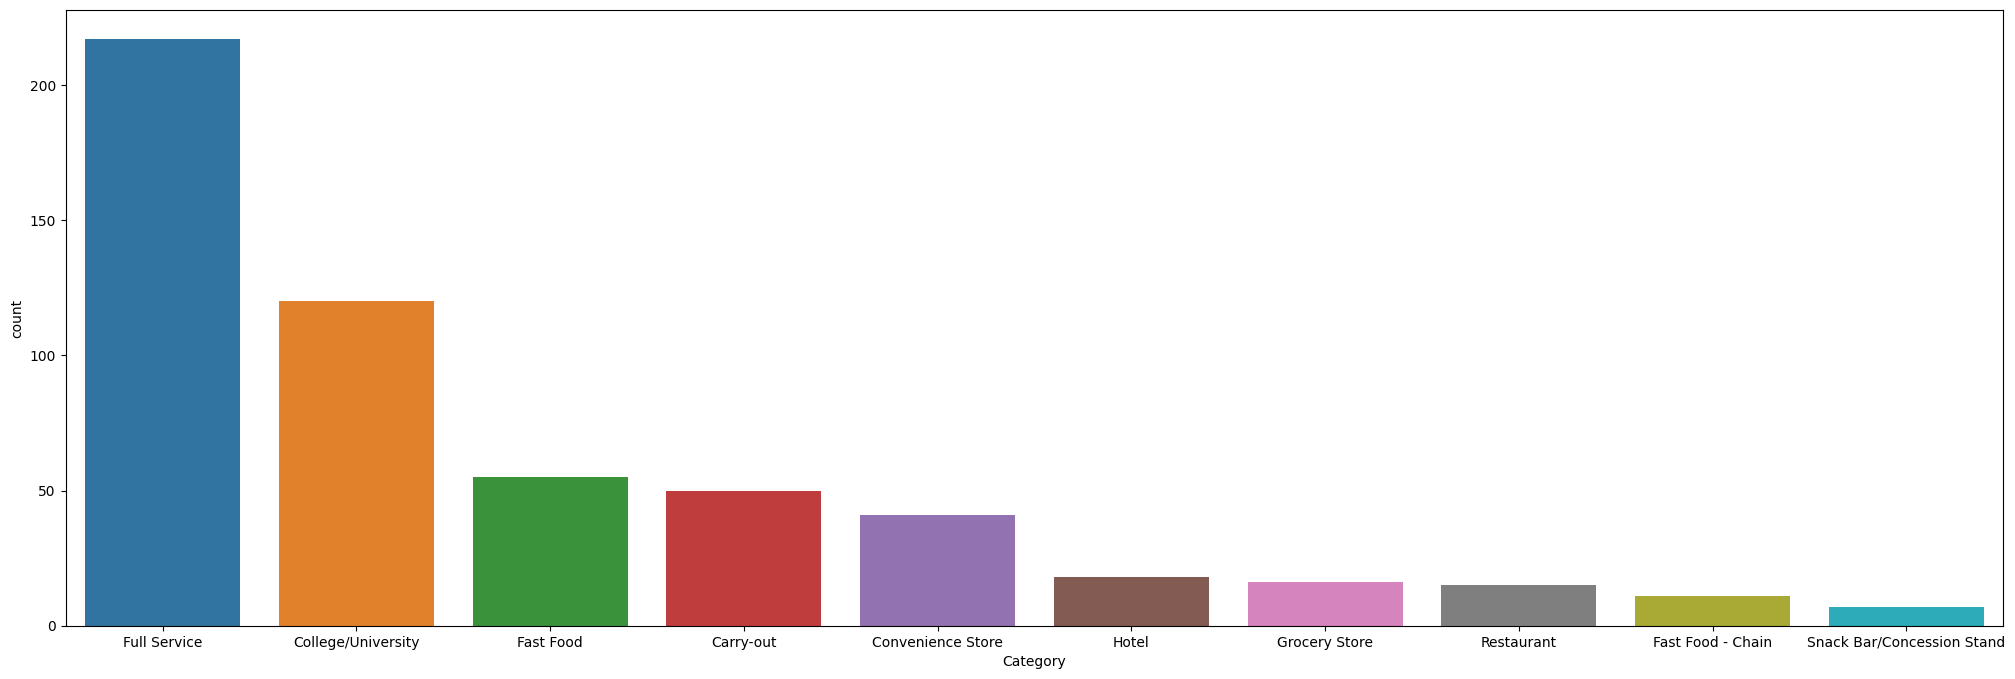

In [ ]:
# plotting barplot for category with Inspection_results=Critical Violations observed
plt.figure(figsize=(25,8))
sns.barplot(x='Category',y='count',data = df3,errwidth=0)


<Axes: xlabel='Inspection_year', ylabel='count'>

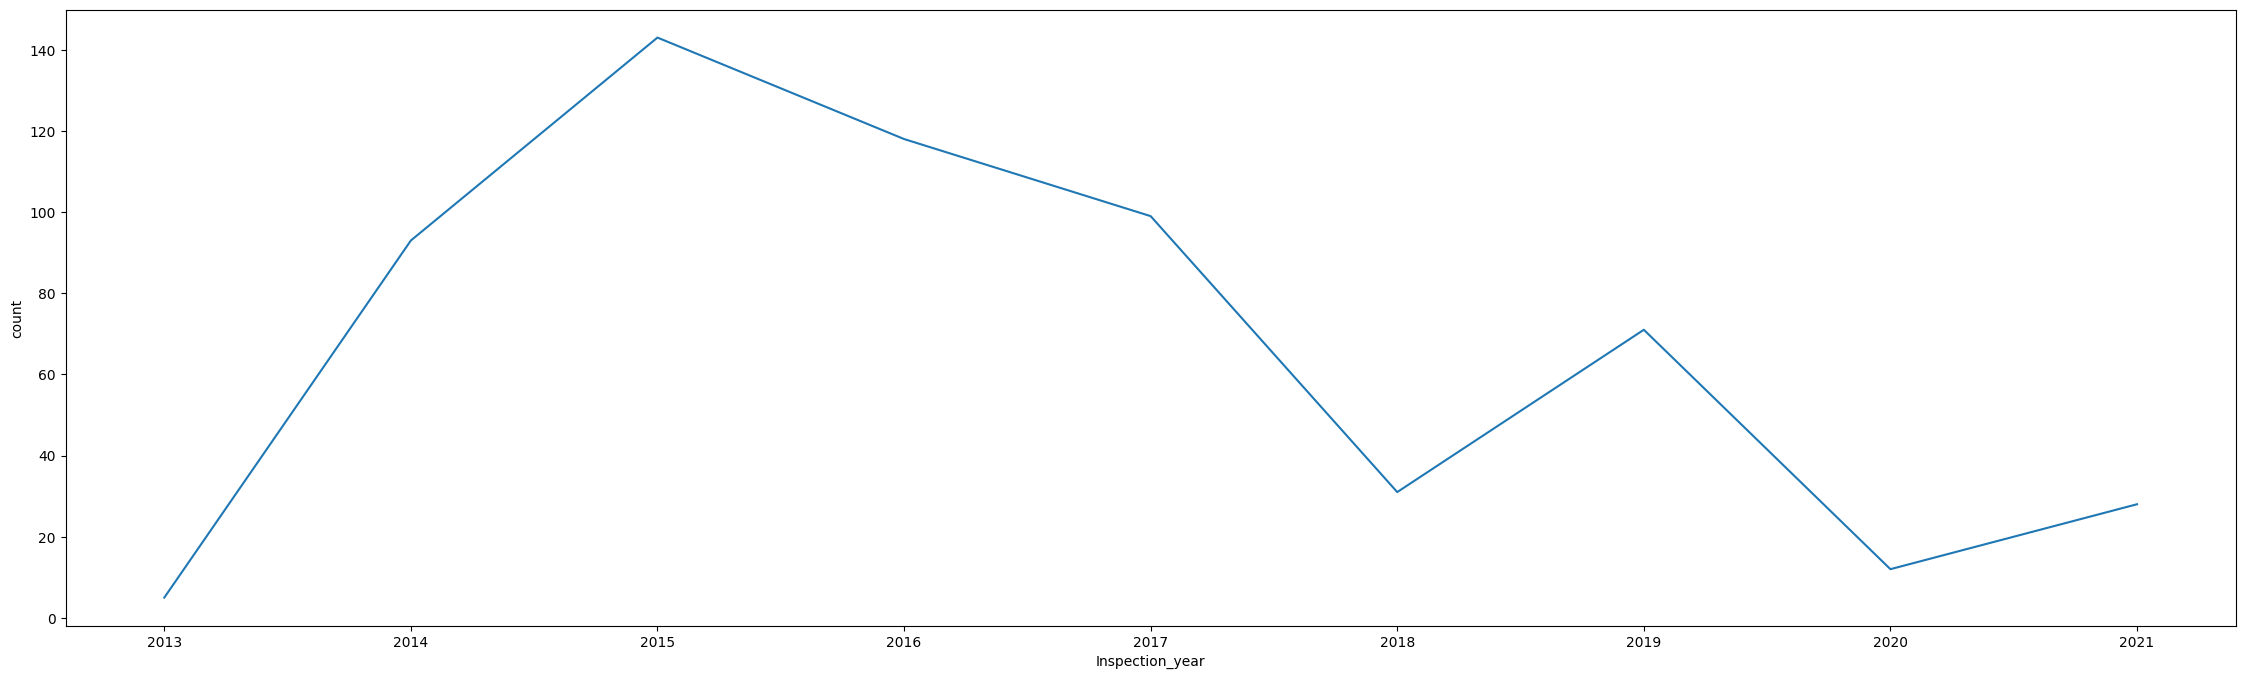

In [ ]:
df4=pd.DataFrame(df.groupby(['Inspection_results','Inspection_year'])['Establishment_id'].count().reset_index())
df4.columns=['Inspection_results','Inspection_year','count']

df4=df4[df4['Inspection_results']=='Critical Violations observed']
df4.sort_values('count',ascending=False,inplace=True)

df4=df4[df4['Inspection_results']=='Critical Violations observed']


plt.figure(figsize=(28,8))
sns.lineplot(x='Inspection_year',y='count',data = df4)

In [ ]:
df5=pd.DataFrame(df.groupby(['Inspection_results','Inspection_type'])['Establishment_id'].count().reset_index())
df5.columns=['Inspection_results','Inspection_type','count']
df5=df5[df5['Inspection_results']=='Critical Violations observed']
df5.sort_values('count',ascending=False,inplace=True)
df5=df5.head(10)

<Axes: xlabel='Inspection_type', ylabel='count'>

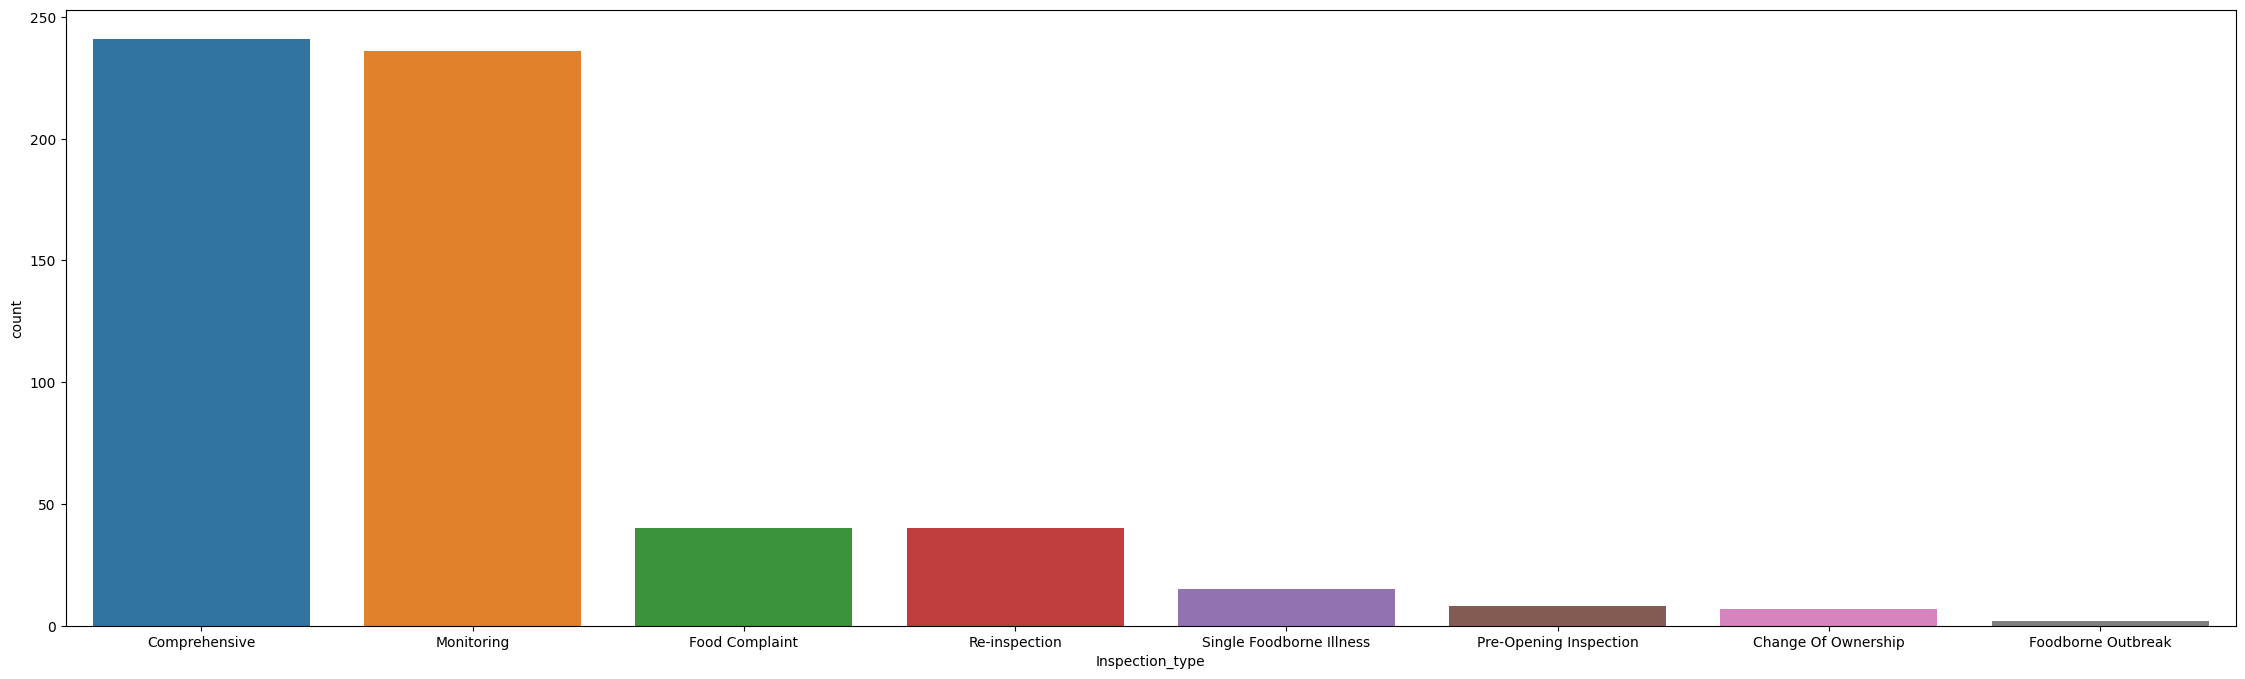

In [ ]:
plt.figure(figsize=(28,8))
sns.barplot(x='Inspection_type',y='count',data = df5,errwidth=0)

Most of the eating places in the PG county between 2013 to 2021  were reported having critical food violations according to the data obatined by diamondback. According to the reported data, about 34.5% of the places violated the regulations. Among all the eating places, full-service restaurants voilated most of the codes with most undergoning comphrehensive inspection. However, on the brigter side, the number of restaurants with such violations have been  drastically decreasing over the years, indicating that restaurant owners have started adpoting these codes.